# Clothes Classification

In [32]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
from matplotlib import pyplot as plt

In [4]:
classes_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [5]:
len(classes_names)

10

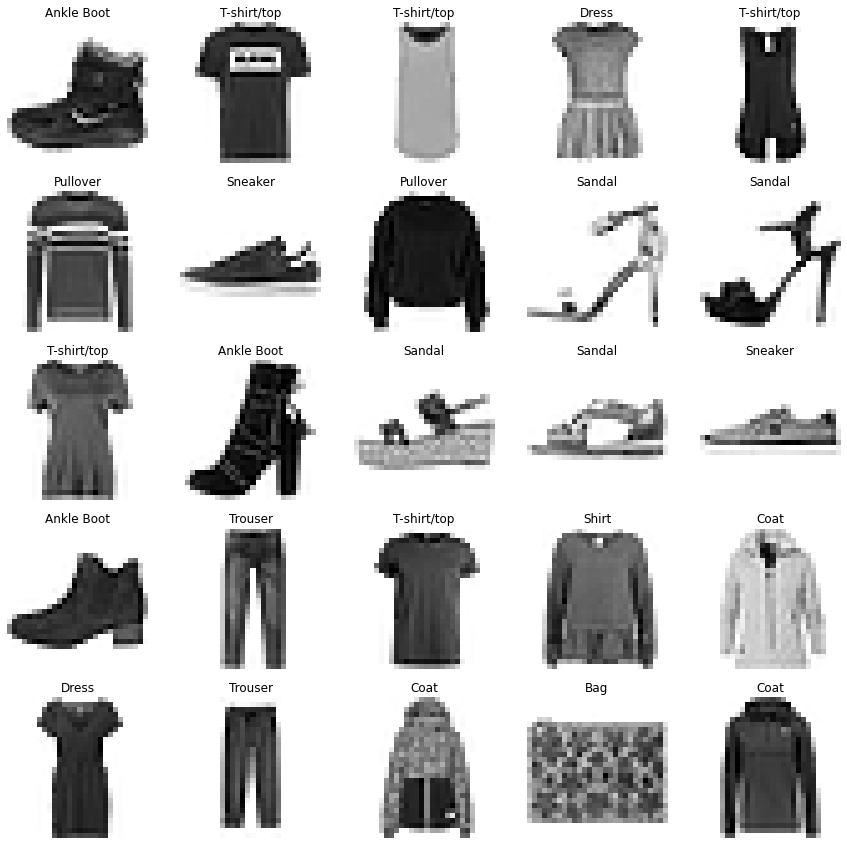

In [6]:
plt.figure(figsize=(15, 15))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.title(classes_names[y_train[i]])
  plt.axis(False)

In [7]:
# Shape
X_train[0].shape, y_train[0].shape

((28, 28), ())

In [8]:
# Input Shape
X_train[0].shape

(28, 28)

In [9]:
# Normalizing for better results
X_train_norm = X_train / 255.
X_test_norm = X_test / 255.

In [10]:
tf.random.set_seed(42)

clothes_model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

clothes_model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer='Adam',
                        metrics=['accuracy'])

clothes_history_1 = clothes_model_1.fit(X_train_norm, y_train, epochs=10, validation_data=(X_test_norm, y_test))


Epoch 1/10
1875/1875 [==============================] - 2s 711us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 1s 653us/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 1s 659us/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 1s 655us/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 1s 653us/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 1s 658us/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 1s 651us/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 -

In [11]:
import pandas as pd

<AxesSubplot:>

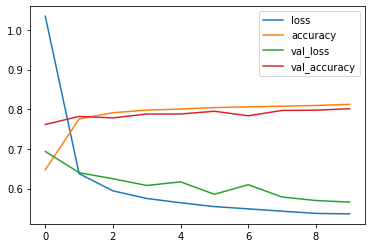

In [12]:
pd.DataFrame(clothes_history_1.history).plot()

# Finding best learning rate

In [14]:
tf.random.set_seed(42)

clothes_model_2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

lr_callback = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * 10**(epoch/20))

clothes_model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer='Adam',
                        metrics=['accuracy'])

clothes_history_2 = clothes_model_2.fit(X_train_norm, y_train, epochs=40, callbacks=[lr_callback], validation_data=(X_test_norm, y_test))


Epoch 1/40
1875/1875 [==============================] - 2s 705us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 1s 656us/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 1s 662us/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 1s 667us/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 1s 655us/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 1s 650us/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [========================

In [15]:
import matplotlib.pyplot as plt

In [16]:
learning_rates = 0.001 * 10 ** (tf.range(40)/20)
learning_rates

<tf.Tensor: shape=(40,), dtype=float64, numpy=
array([0.001     , 0.00112202, 0.00125893, 0.00141254, 0.00158489,
       0.00177828, 0.00199526, 0.00223872, 0.00251189, 0.00281838,
       0.00316228, 0.00354813, 0.00398107, 0.00446684, 0.00501187,
       0.00562341, 0.00630957, 0.00707946, 0.00794328, 0.00891251,
       0.01      , 0.01122018, 0.01258925, 0.01412538, 0.01584893,
       0.01778279, 0.01995262, 0.02238721, 0.02511886, 0.02818383,
       0.03162278, 0.03548134, 0.03981072, 0.04466836, 0.05011872,
       0.05623413, 0.06309573, 0.07079458, 0.07943282, 0.08912509])>

Text(0.5, 1.0, 'Finding the best Learning Rate')

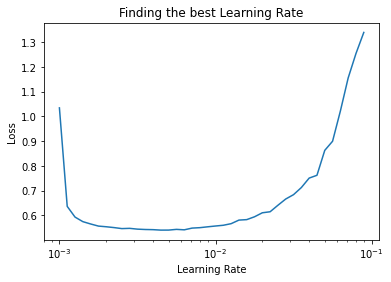

In [17]:
plt.semilogx(learning_rates, clothes_history_2.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Finding the best Learning Rate')

## Probably the best lr = 0.001, so default for Adam

In [18]:
tf.random.set_seed(42)

clothes_model_3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

clothes_model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                        optimizer='Adam',
                        metrics=['accuracy'])

clothes_history_3 = clothes_model_3.fit(X_train_norm, y_train, epochs=20, validation_data=(X_test_norm, y_test))


Epoch 1/20
1875/1875 [==============================] - 2s 761us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 1s 644us/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 1s 643us/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 1s 639us/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 1s 634us/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 1s 641us/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 1s 637us/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 -

# Evaluating

In [19]:
from seaborn import heatmap
from sklearn.metrics import confusion_matrix

In [20]:
from tensorflow.python.ops.gen_math_ops import arg_max
y_pred = clothes_model_3.predict(X_test_norm)
y_pred = tf.argmax(y_pred, axis=-1)
y_pred

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([9, 2, 1, ..., 3, 1, 5], dtype=int64)>

In [21]:
Conf_M = confusion_matrix(y_test, y_pred)
Conf_M

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]], dtype=int64)

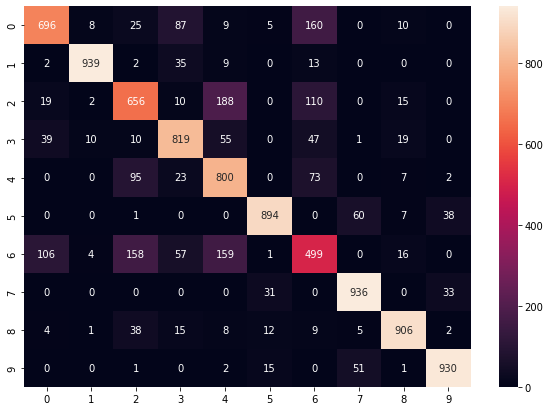

In [22]:
plt.figure(figsize=(10, 7))
heatmap(Conf_M, annot=True, fmt='d');

In [24]:
import random

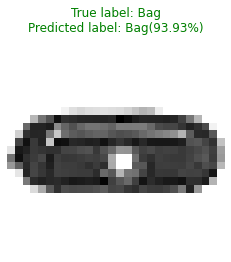

In [205]:
def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap=plt.cm.binary)
  plt.title(f'True label: {true_label}\nPredicted label: {pred_label}({pred_probs.max()*100:.2f}%)', c='g' if pred_label == true_label else 'r')
  plt.axis(False)

plot_random_image(clothes_model_3, X_test_norm, y_test, classes_names)

# Checking Patterns which model recognised

In [26]:
clothes_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 4)                 3140      
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [27]:
clothes_model_3.layers

In [28]:
clothes_model_3.layers[2].get_weights()

[array([[ 1.0736771 , -0.1935821 ,  0.50725377, -0.35606658],
        [ 0.34898207,  1.1341449 ,  0.84304935,  0.5526555 ],
        [ 0.09337565,  0.46247578, -0.6996276 ,  0.58674884],
        [-0.32451496, -0.21780181,  0.5666564 ,  1.275238  ]],
       dtype=float32),
 array([-0.6508776 , -0.28385487,  0.2823329 , -0.3790994 ], dtype=float32)]

In [30]:
!pip install pydot

You should consider upgrading via the 'c:\users\maciej\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [31]:
tf.keras.utils.plot_model(clothes_model_3, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


### (Avaialble on Google Colab)